In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')
df2 = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/beer.txt', delimiter=" ")
df3 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')
df4 = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/datasets.csv')

https://drive.google.com/file/d/1etGP85wJWsgqbsh3gX5oxc8dPKLMA1eT/view


### Chipotle Data

In [3]:
# first 5 rows of the dataset
df1.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
# shape of the dataset
df1.shape

(4622, 5)

In [5]:
# converting choice_description to ingredients
temp = []
for i in df1['choice_description']:
    if type(i)==float:
        temp.append([])
    if type(i)==str:
        temp.append(i.replace("[","").replace("]","").split(', '))
        
df1['ingredients']=temp

In [6]:
# expanding ingredients
from sklearn.preprocessing import MultiLabelBinarizer

# Binarise labels
mlb = MultiLabelBinarizer()
expandedLabelData = mlb.fit_transform(df1["ingredients"])
labelClasses = mlb.classes_

# Create a pandas.DataFrame from our output
expandedLabels = pd.DataFrame(expandedLabelData, columns=labelClasses)

# concatenating the dataframes
df1 = pd.concat([df1, expandedLabels], axis=1)

# dropping unecessary columns
df1.drop('ingredients', inplace=True, axis=1)

In [7]:
# checking for null values
df1.isnull().sum()

order_id                                   0
quantity                                   0
item_name                                  0
choice_description                      1246
item_price                                 0
Adobo-Marinated and Grilled Chicken        0
Adobo-Marinated and Grilled Steak          0
Apple                                      0
Black Beans                                0
Blackberry                                 0
Braised Barbacoa                           0
Braised Carnitas                           0
Brown Rice                                 0
Cheese                                     0
Cilantro-Lime Rice                         0
Clementine                                 0
Coca Cola                                  0
Coke                                       0
Diet Coke                                  0
Diet Dr. Pepper                            0
Dr. Pepper                                 0
Fajita Vegetables                          0
Fajita Veg

In [8]:
df1[df1['choice_description'].isnull()]['item_name'].value_counts()

Chips and Guacamole                      479
Chips                                    211
Bottled Water                            162
Chips and Fresh Tomato Salsa             110
Side of Chips                            101
Chips and Tomatillo Red Chili Salsa       48
Chips and Tomatillo Green Chili Salsa     43
Chips and Tomatillo-Green Chili Salsa     31
Chips and Roasted Chili Corn Salsa        22
Chips and Tomatillo-Red Chili Salsa       20
Chips and Roasted Chili-Corn Salsa        18
Chips and Mild Fresh Tomato Salsa          1
Name: item_name, dtype: int64

The above orders have no choice description or ingredient information

In [9]:
df1[df1['item_name']=='Chips and Guacamole']

,order_id,quantity,item_name,choice_description,item_price,Adobo-Marinated and Grilled Chicken,Adobo-Marinated and Grilled Steak,Apple,Black Beans,Blackberry,...,Sour Cream,Sprite,Tomatillo Green Chili (Medium),Tomatillo Green Chili Salsa,Tomatillo Red Chili (Hot),Tomatillo Red Chili Salsa,Tomatillo-Green Chili Salsa (Medium),Tomatillo-Red Chili Salsa (Hot),Vegetarian Black Beans,White Rice
10,5,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,7,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20,10,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,18,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41,20,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4588,1824,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,1826,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4600,1827,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4605,1828,1,Chips and Guacamole,NaN,$4.45,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


On further inspection we notice anything with chips and bottled water do not have any choice description.

In [10]:
df1.item_name.value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Chips                                    211
Steak Bowl                               211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

We can see that Chicken Bowl and Chicken Buritto are the most popular items whereas Carnitas Salad and Chips and Mild Fresh Tomato Salsa are the least ordered items.

In [11]:
# function to convert str to float
def str_float(num):
    return float(num.replace("$", ""))

In [12]:
# applying func to convert price to float
df1.item_price = df1.item_price.apply(str_float)

In [13]:
df1.item_price.sum()

34500.16

34500 is our total revenue.

In [14]:
# groupby to see item wise revenue
sales = df1.groupby(['item_name'])['item_price'].sum()
# sorting the output
sales.sort_values(ascending=False)

item_name
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Steak Burrito                            3851.43
Steak Bowl                               2260.19
Chips and Guacamole                      2201.04
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Veggie Burrito                            934.77
Barbacoa Burrito                          894.75
Veggie Bowl                               867.99
Carnitas Bowl                             736.71
Barbacoa Bowl                             672.36
Carnitas Burrito                          597.83
Steak Soft Tacos                          536.05
Chips                                     494.34
Chicken Crispy Tacos                      472.13
Canned Soft Drink                         438.75
Carnitas Soft Tacos                       375.94
Chips and Fresh Tomato Salsa              361.36
Steak Crispy Tacos                        357.34
6 Pack Sof

### Beer Data

In [15]:
# first 5 rows
df2.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [16]:
# shape of the dataset
df2.shape

(20, 5)

In [17]:
# data description
df2.describe()

,calories,sodium,alcohol,cost
count,20.000000,20.000000,20.000000,20.000000
mean,132.550000,14.950000,4.240000,0.494500
std,30.283702,6.581273,1.087924,0.144858
min,68.000000,6.000000,0.900000,0.280000
25%,110.250000,9.500000,4.175000,0.427500
50%,144.000000,15.000000,4.600000,0.435000
75%,150.250000,19.000000,4.900000,0.485000
max,175.000000,27.000000,5.500000,0.790000


<AxesSubplot:ylabel='Frequency'>

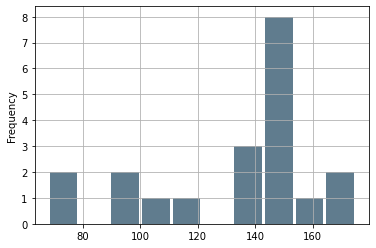

In [18]:
# plotting calories histogram
df2.calories.plot.hist(grid=True, rwidth=0.9, color='#607c8e')

We can see that most beers have calories around 140 to 160.

<AxesSubplot:ylabel='Frequency'>

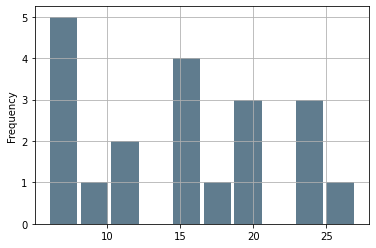

In [19]:
# plotting sodium histogram
df2.sodium.plot.hist(grid=True, rwidth=0.9, color='#607c8e')

We can see that most beers have a sodium level nearing 5.

<AxesSubplot:ylabel='Frequency'>

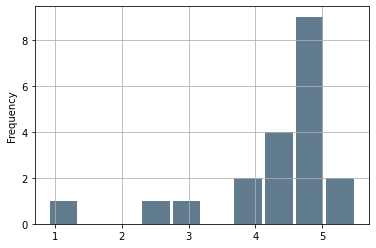

In [20]:
# plotting alchol histogram
df2.alcohol.plot.hist(grid=True, rwidth=0.9, color='#607c8e')

We can see that most beers have an alcohol content near 5.

<AxesSubplot:ylabel='Frequency'>

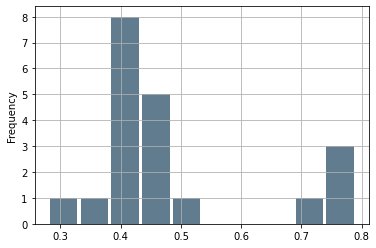

In [21]:
# plotting cost histogram
df2.cost.plot.hist(grid=True, rwidth=0.9, color='#607c8e')

We can see that most beers cost 0.4.

Let's try clustering the beer data

In [22]:
cluster_data = df2.drop('name', axis=1)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


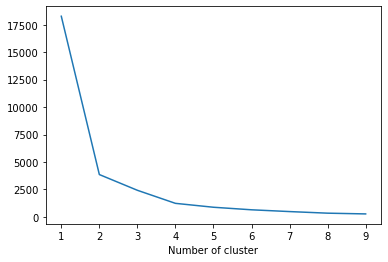

In [23]:
from sklearn.cluster import KMeans

sse={}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(cluster_data)
    cluster_data["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

Chosing 2 as the number of clusters.

In [24]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(cluster_data[['calories', 'sodium', 'alcohol', 'cost']])
df2['Cluster'] = kmeans.predict(df2[['calories', 'sodium', 'alcohol', 'cost']])

Let's visualize our clusters

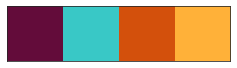

In [25]:
import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

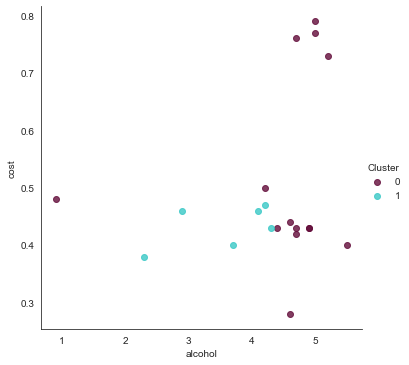

In [26]:
sns.lmplot(data=df2, x='alcohol', y='cost', hue='Cluster', fit_reg=False, legend=True, legend_out=True)

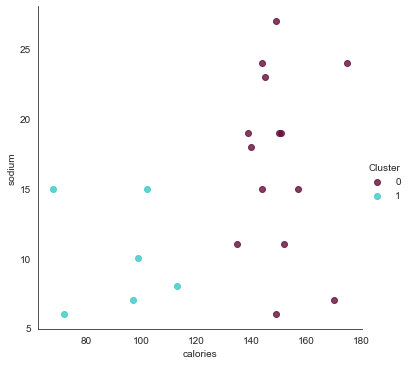

In [27]:
sns.lmplot(data=df2, x='calories', y='sodium', hue='Cluster', fit_reg=False, legend=True, legend_out=True)

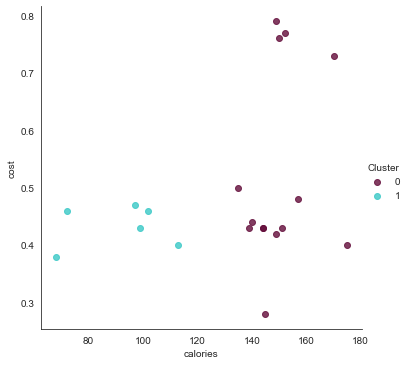

In [28]:
sns.lmplot(data=df2, x='calories', y='cost', hue='Cluster', fit_reg=False, legend=True, legend_out=True)

### Crime Data

In [29]:
# first 5 rows
df3.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [30]:
# last 5 rows
df3.tail()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
50,2010,309330219,10363873,1251248,9112625,14772,85593,369089,781844,2168457,6204601,739565
51,2011,311587816,10258774,1206031,9052743,14661,84175,354772,752423,2185140,6151095,716508
52,2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186
53,2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294
54,2014,318857056,9475816,1197987,8277829,14249,84041,325802,741291,1729806,5858496,689527


In [31]:
df3.Year.unique()

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

We have crime data from the year 1960 to 2014.

In [32]:
# shape of the dataset
df3.shape

(55, 12)

In [33]:
# checking for null values
df3.isnull().sum()

Year                  0
Population            0
Total                 0
Violent               0
Property              0
Murder                0
Forcible_Rape         0
Robbery               0
Aggravated_assault    0
Burglary              0
Larceny_Theft         0
Vehicle_Theft         0
dtype: int64

In [38]:
df3.describe()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
count,55.00000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01,55.000000,55.000000,55.000000,5.500000e+01,5.500000e+01,5.500000e+01,5.500000e+01
mean,1987.00000,2.461556e+08,1.060315e+07,1.188806e+06,9.412499e+06,17317.236364,72714.800000,416449.890909,6.811818e+05,2.424017e+06,5.959947e+06,1.028614e+06
std,16.02082,4.166216e+07,3.175931e+06,4.597107e+05,2.738512e+06,4267.442664,28278.006893,150506.403782,2.960255e+05,7.259004e+05,1.846401e+06,3.455693e+05
min,1960.00000,1.793232e+08,3.384200e+06,2.884600e+05,3.095700e+06,8530.000000,17190.000000,106670.000000,1.543200e+05,9.121000e+05,1.855400e+06,3.282000e+05
25%,1973.50000,2.106215e+08,9.096958e+06,9.253150e+05,8.060014e+06,14819.000000,53400.000000,354911.500000,4.384300e+05,2.105336e+06,4.843350e+06,7.896260e+05
50%,1987.00000,2.422829e+08,1.140151e+07,1.322390e+06,1.018259e+07,17030.000000,84230.000000,423557.000000,7.412910e+05,2.329950e+06,6.591900e+06,1.032200e+06
75%,2000.50000,2.833697e+08,1.308449e+07,1.432762e+06,1.160509e+07,20561.500000,92930.000000,512137.000000,9.002150e+05,3.073600e+06,7.168450e+06,1.239302e+06
max,2014.00000,3.188571e+08,1.487290e+07,1.932270e+06,1.296110e+07,24700.000000,109060.000000,687730.000000,1.135610e+06,3.795200e+06,8.142200e+06,1.661700e+06


Let's visualize our dataset

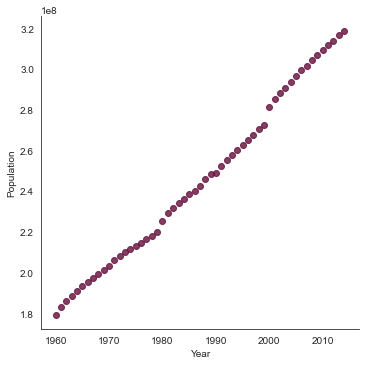

In [37]:
sns.lmplot(data=df3, x='Year', y='Population', fit_reg=False, legend=True, legend_out=True)

We can see a linear growth in population along the years.

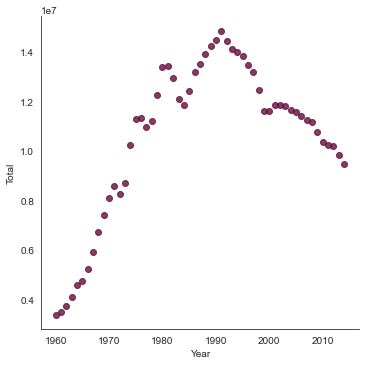

In [39]:
sns.lmplot(data=df3, x='Year', y='Total', fit_reg=False, legend=True, legend_out=True)

We can see a linear growth along with a sharp decline in the total crimes committed along the years.

### Dataset Repository

In [53]:
# first 5 rows
df4.head()

,Package,Item,Title,Rows,Cols,n_binary,n_character,n_factor,n_logical,n_numeric,CSV,Doc
0,AER,Affairs,Fair's Extramarital Affairs Data,601,9,2,0,2,0,7,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
1,AER,ArgentinaCPI,Consumer Price Index in Argentina,80,2,0,0,0,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
2,AER,BankWages,Bank Wages,474,4,2,0,3,0,1,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
3,AER,BenderlyZwick,"Benderly and Zwick Data: Inflation, Growth and...",31,5,0,0,0,0,5,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...
4,AER,BondYield,Bond Yield Data,60,2,0,0,0,0,2,https://vincentarelbundock.github.io/Rdatasets...,https://vincentarelbundock.github.io/Rdatasets...


In [52]:
# Shape of the dataset
df4.shape

(1714, 12)

In [74]:
# finding package count
df4.Package.value_counts().sort_values(ascending=False)

Stat2Data         211
openintro         198
Ecdat             134
DAAG              121
AER               107
MASS               87
datasets           84
stevedata          69
carData            63
boot               49
HistData           46
HSAUR              41
robustbase         40
fpp2               38
drc                35
vcd                33
causaldata         33
mosaicData         31
KMsurv             27
psych              23
COUNT              21
gap                18
pscl               17
tidyr              15
plm                14
survival           14
ISLR               13
lme4               11
ggplot2            11
geepack             9
cluster             9
quantreg            7
lattice             7
evir                7
texmex              7
sem                 6
rpart               6
mediation           6
gt                  6
dplyr               5
nycflights13        5
forecast            5
HLMdiag             4
sandwich            4
dragracer           3
reshape2  

In [75]:
# finding max value in row column
df4.Rows.max()

1414593

The biggest dataset in the repository has 1414593 rows.

In [76]:
# finding index of max value in row column
df4[['Rows']].idxmax()

Rows    1157
dtype: int64

In [77]:
# name of the dataset with max rows
df4['Title'][1157]

'US Military Demographics'

In [78]:
# pulling entire row
df4.iloc[1157]

Package                                                openintro
Item                                                    military
Title                                   US Military Demographics
Rows                                                     1414593
Cols                                                           6
n_binary                                                       2
n_character                                                    0
n_factor                                                       4
n_logical                                                      1
n_numeric                                                      1
CSV            https://vincentarelbundock.github.io/Rdatasets...
Doc            https://vincentarelbundock.github.io/Rdatasets...
Name: 1157, dtype: object

In [79]:
# finding max value in Cols
df4.Cols.max()

6831

A dataset in the repository has a max number of 6831 columns.

In [80]:
# finding index of max value in cols
df4[['Cols']].idxmax()

Cols    859
dtype: int64

In [81]:
# name of the dataset with max cols
df4['Title'][859]

'NCI 60 Data'

In [82]:
# pulling entire row
df4.iloc[859]

Package                                                     ISLR
Item                                                       NCI60
Title                                                NCI 60 Data
Rows                                                          64
Cols                                                        6831
n_binary                                                       0
n_character                                                    1
n_factor                                                       0
n_logical                                                      0
n_numeric                                                   6830
CSV            https://vincentarelbundock.github.io/Rdatasets...
Doc            https://vincentarelbundock.github.io/Rdatasets...
Name: 859, dtype: object